# Аналитика в авиакомпании

Представлены два набора данных, в которых содержатся результаты запросов из предыдущих заданий: <br>

1. **/datasets/query_1.csv** В нём содержится информация о:<br>
model — модели самолета<br>
flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года<br>
2. **/datasets/query_3.csv** В нём содержится информация о:<br>
city — городах<br>
average_flights — среднем количестве рейсов, прибывающих в город city за день в августе 2018 года<br>

Для этих двух наборов данных нужно:<br>
- импортировать файлы;<br>
- изучить данные в них;<br>
- проверить типы данных на корректность;<br>
- выбрать топ-10 городов по количеству рейсов;<br>
- построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;<br>
- сделать выводы по каждому из графиков, пояснить результат.


### Изучение данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
flights_model = pd.read_csv('/datasets/query_1.csv')
flights_city = pd.read_csv('/datasets/query_3.csv')

Посмотрим на данные в первом датасете:

In [3]:
flights_model

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


Есть тройка явных лидеров - **Bombardier CRJ-200** (пассажировместимостью от 40 до 50 человек), **Cessna 208 Caravan** (небольшой самолет на 9 человек) и **Sukhoi SuperJet-100** (предназначенный для перевозки от 87 до 108 пассажиров). <br>
На последнем месте по количеству рейсов - **Boeing 777-300** (позволяет разместить до 550 пассажиров в одноклассной конфигурации, а максимальная дальность составляет чуть больше 11 тысяч км). <br>
Данные по пассажировместимости из Википедии. <br>
Можно предположить, что чаще всего летают небольшие самолеты из-за того, что скорее всего, они дешевле в обслуживании и потребляют меньше топлива, что является прекрасным вариантом для полетов внутри страны.
Boeing 777-300 же может летать далеко, при этом перевозить большое количество пассажиров за раз.

In [4]:
flights_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


Тип данных - корректный, пропущенных значений нет. Все в порядке.

In [5]:
flights_city

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


In [6]:
flights_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


Единственное - для удобства можно округлить значения в average_flights:

In [7]:
flights_city['average_flights'] = round(flights_city['average_flights'], 2)

In [8]:
flights_city.describe()

,average_flights
count,101.000000
mean,5.493663
std,13.119346
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870000
max,129.770000


Максимальное количество рейсов в день - почти 130. Меньше всего - 1. <br>
Среднее значение - 5 рейсов в день. 

Выберем топ-10 городов по количеству рейсов:

In [9]:
top_10_cities = flights_city.sort_values(by = 'average_flights', ascending = False).head(10)
top_10_cities

,city,average_flights
43,Москва,129.77
70,Санкт-Петербург,31.16
54,Новосибирск,17.32
33,Красноярск,11.58
20,Екатеринбург,11.32
67,Ростов-на-Дону,10.19
63,Пермь,10.13
10,Брянск,10.00
74,Сочи,9.61
84,Ульяновск,9.58


На первом месте - Москва. Второе и третье делят Санкт-Петербург и Новосибирск. <br>
Интересно видеть в десятке Брянск (город с населением 400 тысяч) и Ульяновск (рядом есть Казань с населением больше миллиона).

####  Вывод: 
    

Проверили данные на корректность, округлили данные в таблице со средним количеством рейсов по городам. <br>
- Среди самолетов есть тройка явных лидеров - Bombardier CRJ-200, Cessna 208 Caravan  и Sukhoi SuperJet-100. <br>
На последнем месте по количеству рейсов - Boeing 777-300. <br>
- По среднему количеству рейсов в день с сильным отрывом лидирует Москва (129.77), второе и третье делят Санкт-Петербург и Новосибирск.


### Построение графиков

####    Модели самолетов и количество рейсов

Text(0.5, 1.0, 'Модели самолетов и количество рейсов')

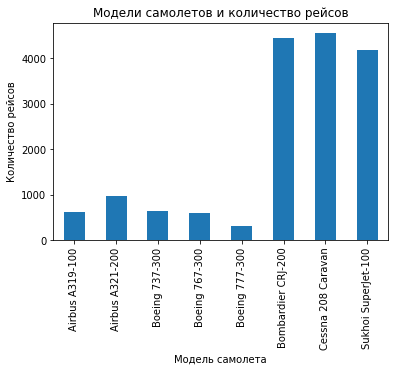

In [10]:
flights_model.plot(y = 'flights_amount', x = 'model', kind = 'bar', legend=None)
plt.xlabel('Модель самолета')
plt.ylabel('Количество рейсов')
plt.title('Модели самолетов и количество рейсов')

Тройка лидеров очевидна - Bombardier CRJ-200, Cessna 208 Caravan и Sukhoi SuperJet-100.

#### Города и количество рейсов

Т.к. городов много, разделим график на два:

Text(0.5, 1.0, 'Города и количество рейсов')

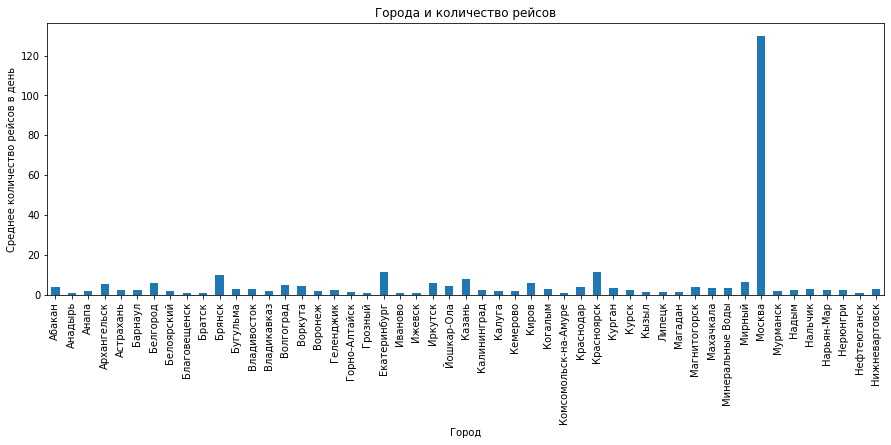

In [11]:
flights_city.head(51).plot(y = 'average_flights', x = 'city', kind = 'bar', legend=None, figsize = (15, 5))
plt.xlabel('Город')
plt.ylabel('Среднее количество рейсов в день')
plt.title('Города и количество рейсов')

Москва ожидаемо выделяется среди других городов по количеству рейсов. 

Text(0.5, 1.0, 'Города и количество рейсов')

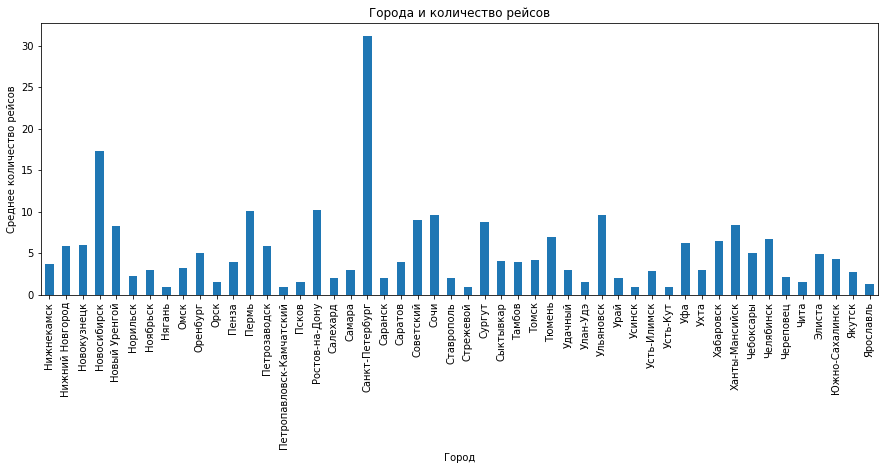

In [12]:
flights_city.tail(50).plot(y = 'average_flights', x = 'city', kind = 'bar', legend=None, figsize = (15, 5))
plt.xlabel('Город')
plt.ylabel('Среднее количество рейсов')
plt.title('Города и количество рейсов')

А вот тут явный лидер - Санкт-Петербург, далее - Новосибирск. 

#### Топ-10 городов и количество рейсов

Text(0.5, 1.0, 'Топ-10 городов и количество рейсов')

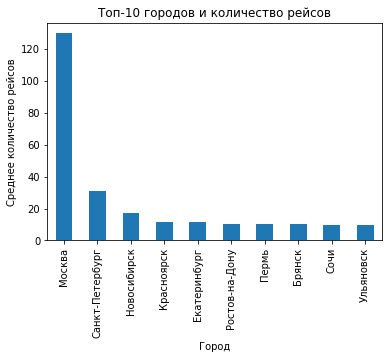

In [13]:
top_10_cities.tail(50).plot(y = 'average_flights', x = 'city', kind = 'bar', legend=None)
plt.xlabel('Город')
plt.ylabel('Среднее количество рейсов')
plt.title('Топ-10 городов и количество рейсов')

Москва даже на фоне десятки лидеров выделяется.  <br>
На первом месте - Москва, следом идут Санкт-Петербург и Новосибирск.   <br>
Все остальные города имеют примерно одинаковое количество рейсов. 

### Вывод

Построили графики по количеству рейсов: <br>
1. Самыми популярными моделями самолетов являются Bombardier CRJ-200 (пассажировместимостью от 40 до 50 человек), Cessna 208 Caravan (небольшой самолет на 9 человек) и Sukhoi SuperJet-100 (предназначенный для перевозки от 87 до 108 пассажиров).<br>
На последнем месте по количеству рейсов - Boeing 777-300 (позволяет разместить до 550 пассажиров в одноклассной конфигурации, а максимальная дальность составляет чуть больше 11 тысяч км). <br>
   Можно предположить, что чаще всего летают небольшие самолеты из-за того, что скорее всего, они дешевле в обслуживании и потребляют меньше топлива, что является прекрасным вариантом для полетов внутри страны. Boeing 777-300 же может летать далеко, при этом перевозить большое количество пассажиров за раз. <br>
2. Самым популярной отправной точкой полетов является Москва (однозначный лидер по среднему количеству рейсов в день - почти 130 рейсов). На втором и третьем месте -  Санкт-Петербург и Новосибирск соответственно.
